In [1]:
# %pip install selenium
# %pip install pymongo
# %pip install numpy
# %pip install pandas
# %pip install sklearn
# %pip install matplotlib
# %pip install BeautifulSoup
# %pip install python-dotenv pymongo dnspython
# %pip install wordcloud
# %pip install scikit-learn
# %pip install seaborn
# make sure kernel will reload .py every time .
%load_ext autoreload
%autoreload 2

In [2]:
# ============================================================
# CELL #1: Setup & Import Dependencies
# Description: Install required packages and import libraries
# ============================================================

# import DB configuration Enum
from constant import CollectionEnum

In [3]:
# ============================================================
# CELL #2: Define NoFluffJobs Web Scraper Class
# Description: Class for scraping job data from NoFluffJobs
# Includes methods for HTML scraping, parsing, and MongoDB storage
# ============================================================

# ============================================================
# CELL #3: Execute NoFluffJobs Scraper
# Description: Run the web scraper to collect raw HTML data
# from NoFluffJobs and save it to MongoDB
# ============================================================

from WebScrapingNoFluff import WebScrapingNoFluff


scraperNoFluff = WebScrapingNoFluff(query_term='backend')
scraperNoFluff.scrape_save_raw_to_db()


Initialise WebScraping instance
DB MODE:  local
 Connecting to Local MongoDB (mongodb://localhost:27017/)...
✅ Successfully connected to database: BD_final
Clicked 'See more' (1/3)
Clicked 'See more' (2/3)
Clicked 'See more' (3/3)
All pages loaded. Capturing final HTML...
Raw HTML saved to MongoDB! Document ID: 696f5a0a609803bd16bb5cc6


In [4]:
# ============================================================
# CELL #4: Parse and Extract Structured Job Data
# Description: Extract job title, company, salary, location
# from raw HTML and save to MongoDB jobs_processed collection
# ============================================================

scraperNoFluff.process_and_save()

Found 80 job postings in HTML.
Successfully processed 80 jobs and saved to 'jobs_processed'.


In [5]:
# ============================================================
# CELL #5: Scrape Must-Have Skills
# Description: Visit each job detail page and extract
# the must-have skills list, adding to MongoDB documents
# ============================================================

scraperNoFluff.scrape_must_have_skills()

Scraping Must-have skills for 80 jobs
✔ Senior Software Engineer Backend (Java) → ['java', 'rest api', 'microservices', 'docker', 'kubernetes']
✔ Mid/Senior Backend Developer (NestJS + Postgres) → ['nestjs', 'typescript', 'postgresql', 'node.js']
✔ Remote Senior Backend TypeScript Developer → ['javascript', 'node.js', 'typescript', 'rest api', 'sql', 'nosql', 'express', 'nest.js', 'backend', 'koa.js']
✔ Remote Backend/Cloud Engineering Manager → ['people management', '.net', 'azure', 'infrastructure as code']
✔ Senior Backend Developer → ['java', 'kotlin', 'docker', 'google cloud platform', 'amazon web services', 'kubernetes']
✔ Backend Developer (Python) → ['python', 'crm', 'microsoft azure', 'fastapi', 'linux', 'unix', 'rest api', 'soap']
✔ Senior Software Development Engineer in Test (Backend) → ['java', 'test automation', 'bdd', 'microservices']
✔ Senior Backend Developer → ['degree', 'laravel', 'php', 'web services', 'test case', 'rest api', 'linux', 'communication skills', 'javas

In [6]:
# ============================================================
# CELL #6: Define JustJoin.it API Scraper Class
# Description: Class for scraping job data from JustJoin.it
# using their public API (faster than HTML scraping)
# ============================================================

# ============================================================
# CELL #7: Execute JustJoin.it API Scraper
# Description: Scrape jobs from JustJoin.it and save to
# MongoDB jobs_processed_jj collection (includes skills)
# ============================================================

from WebScrapingJustJoin import WebScrapingJustJoin

jj_scraper = WebScrapingJustJoin(query_term="backend")
jj_scraper.scrape_and_process()

Initialise WebScrapingJustJoin instance
✅ JustJoin connected to DB
✅ Saved 300 JustJoin jobs


In [7]:
# ============================================================
# CELL #8: Job Market Clustering and Skill Value Analysis
# Description: Orchestrate the end-to-end analytical pipeline using 
# JobClusterManager. This includes data retrieval from MongoDB, 
# TF-IDF feature engineering, K-Means clustering, salary distribution 
# statistics, and identifying high-value technical skill gaps.
# ============================================================
from JobClusterManager import JobClusterManager


manager = JobClusterManager()

# Cell 8.Load and preprocess data
df = manager.load_and_preprocess_data()


Loading data from MongoDB...
Loaded 380 jobs with standardized skills.


In [8]:

# CELL #9: Skill frequency analysis (via MongoDB aggregation)
skill_freq = manager.get_skill_frequency_analysis()
print("Top 5 Skills:", skill_freq[:5])


Top 5 Skills: [{'_id': 'java', 'job_count': 130, 'unique_titles_count': 104, 'example_titles': ['Senior Game Client Engineer (Java/Javascript/C++)', 'Java Technical Leader', 'Senior Backend Engineer (Big Data)', 'Backend Engineer - Payments Platform', 'Senior Backend Developer with leadership experience - Freelance', 'Programista/Programistka Backend (Java – Mid/Senior)', 'Senior Backend Engineer (f/m)', 'Backend Developer - NodeJS (Mid/Mid+)', 'Senior Software Development Engineer in Test (Backend)', '👉 Senior Java Developer', 'Senior Backend Engineer Retention', 'Middle Software Engineer (Any JVM language)', 'Middle Backend Developer (Java)', 'Java Tech Lead', 'Senior Java Backend Developer – Cloud and Banking Solutions 💥', 'Senior Software Engineer – Backend (Product Intelligence)', 'Senior DevOps Engineer – Development Focus', 'Senior/Lead Backend Developer', 'Lead Backend Engineer (Java/Kotlin) (m/f/d)', 'Backend Engineer', 'Senior Java Developer - Smart City', 'Senior Backend Eng

In [9]:

# CELL #10 TF-IDF Vectorization
manager.vectorize_skills()


Skill matrix shape: (380, 106)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2583 stored elements and shape (380, 106)>

Evaluating K values...
k=2, silhouette score=0.048
k=3, silhouette score=0.062
k=4, silhouette score=0.067
k=5, silhouette score=0.074
k=6, silhouette score=0.080
k=7, silhouette score=0.083
k=8, silhouette score=0.085
k=9, silhouette score=0.088
k=10, silhouette score=0.076
k=11, silhouette score=0.090
k=12, silhouette score=0.103
k=13, silhouette score=0.094
k=14, silhouette score=0.104
k=15, silhouette score=0.107
k=16, silhouette score=0.101
k=17, silhouette score=0.110
k=18, silhouette score=0.102
k=19, silhouette score=0.115


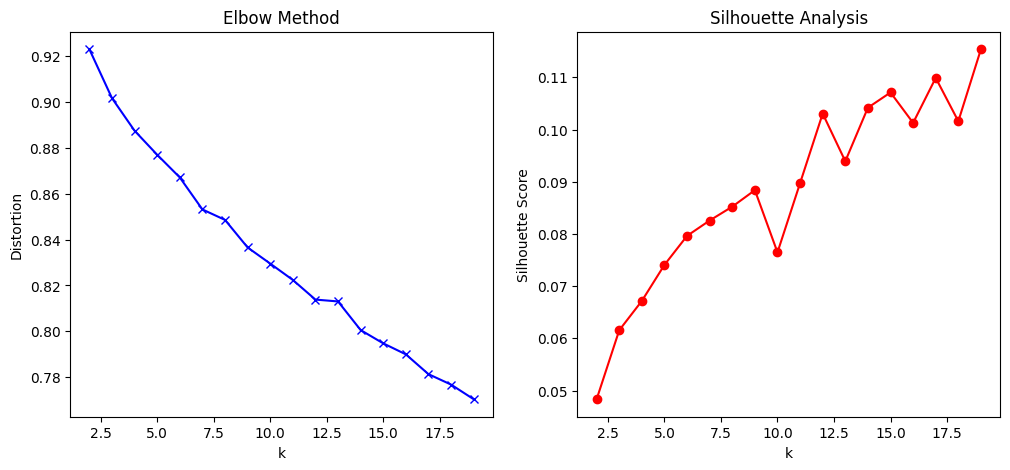

In [10]:

# CELL #11 & #12 (Optional) Determine optimal K - will display Elbow and Silhouette plots
manager.plot_optimal_k()


In [11]:

# CELL #13 Run K-Means clustering (e.g., setting k=12)
manager.run_clustering(k_optimal=12)



Jobs distribution per cluster:
Cluster 0: 31 jobs
  Representative skills: net, azure, sql, microsoft, core, asp, cloud, devops, backend, kubernetes
Cluster 1: 50 jobs
  Representative skills: cd, ci, aws, docker, sql, kubernetes, git, javascript, api, java
Cluster 2: 56 jobs
  Representative skills: js, node, typescript, react, nest, postgresql, aws, javascript, nestjs, next
Cluster 3: 39 jobs
  Representative skills: python, django, fastapi, postgresql, docker, api, sql, rest, gcp, kubernetes
Cluster 4: 12 jobs
  Representative skills: linux, unix, databases, python, backend, rest, jvm, api, git, postgresql
Cluster 5: 19 jobs
  Representative skills: php, symfony, mysql, laravel, docker, linux, git, rabbitmq, elasticsearch, redis
Cluster 6: 37 jobs
  Representative skills: java, react, hibernate, aws, javascript, angular, english, kafka, spring, typescript
Cluster 7: 46 jobs
  Representative skills: spring, boot, java, rest, microservices, hibernate, api, aws, kafka, docker
Cluster 


Salary Statistics by Cluster (Sorted by Median):
         count          mean   median           std
cluster                                            
6           29  26774.827586  27000.0   8123.560928
7           32  25186.093750  25158.0   6855.167053
8           19  22653.157895  24500.0   8331.611857
2           48  22582.468750  24000.0   5378.253137
1           35  22835.185714  23650.0   7916.146801
11           9  22124.444444  22500.0   2972.789562
4           10  24236.800000  22434.0  11867.372084
9           14  19128.571429  21750.0  10695.090072
3           28  19760.625000  21720.0   7454.106612
5           11  18860.000000  21000.0   5095.370448
0           13  22842.307692  20160.0   8099.707972
10          10  18131.000000  15960.0   3946.144250


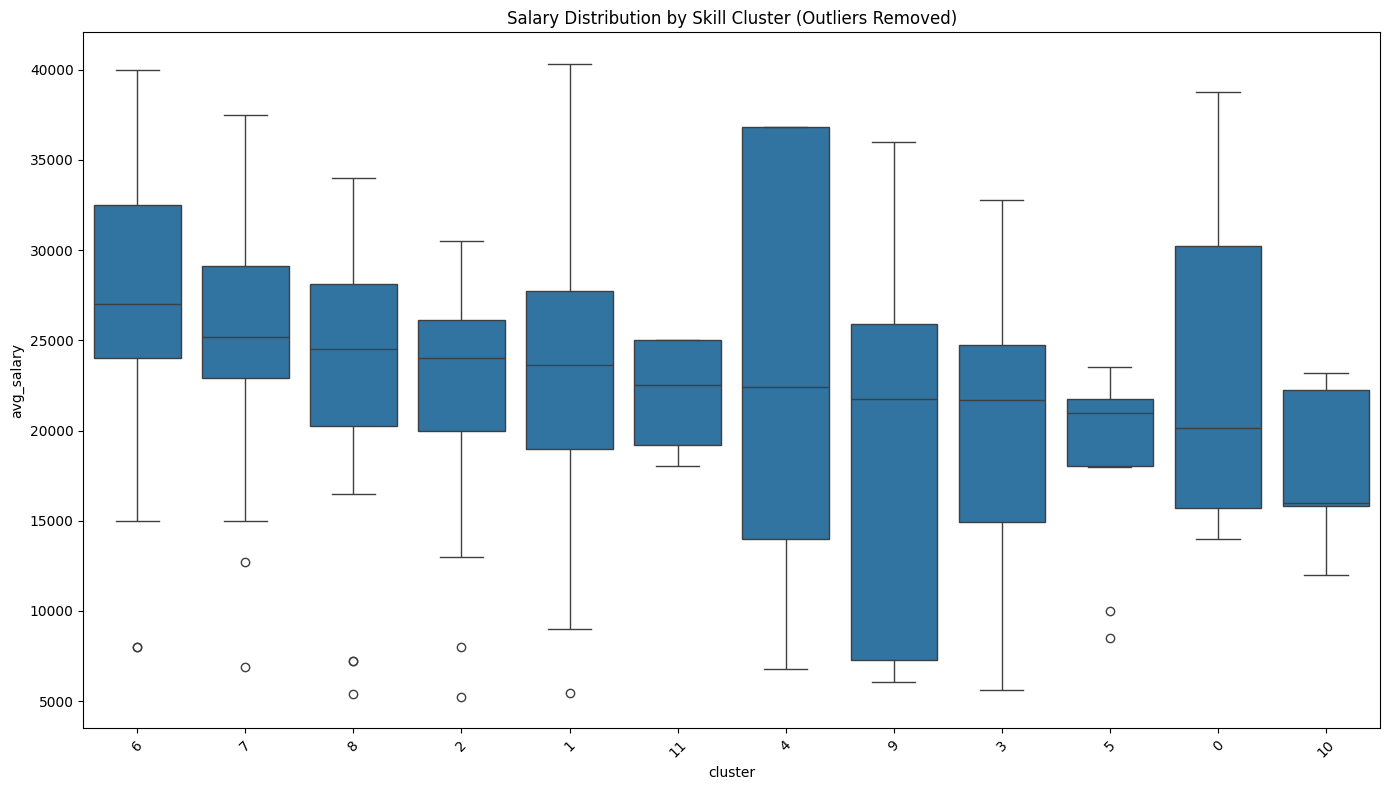

In [12]:

# CELL #14 Salary distribution analysis per cluster
cluster_stats = manager.analyze_salaries()


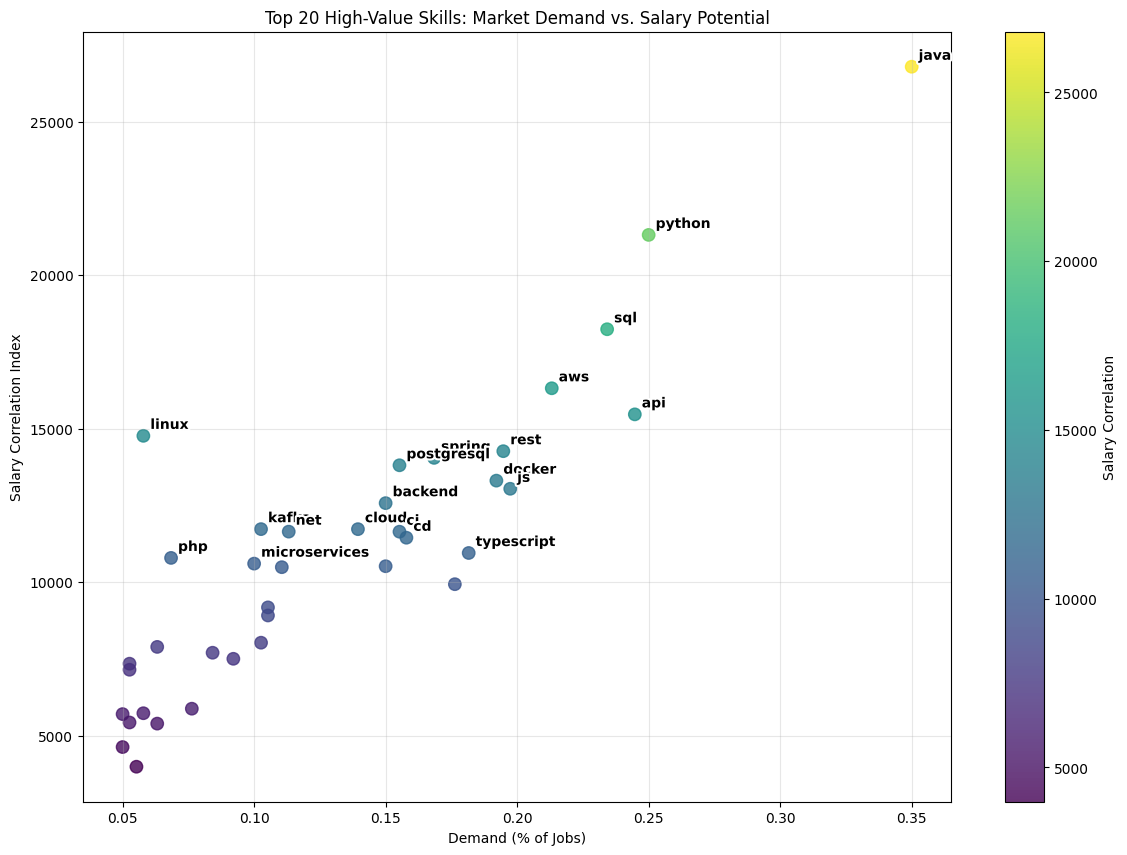

Top 10 High-Value Skills:
         skill  salary_correlation    demand
42        java        26798.178708  0.350000
75      python        21317.104406  0.250000
94         sql        18243.061396  0.234211
10         aws        16319.480325  0.213158
5          api        15468.885490  0.244737
55       linux        14768.968095  0.057895
80        rest        14268.984663  0.194737
93      spring        14050.641480  0.168421
73  postgresql        13809.670551  0.155263
27      docker        13308.906301  0.192105


In [13]:

# CELL #15 Skill gap and high-value skill analysis
gap_analysis = manager.analyze_skill_gap(cluster_stats)
print("Top 10 High-Value Skills:")
print(gap_analysis.head(10))


The most important 15 skills



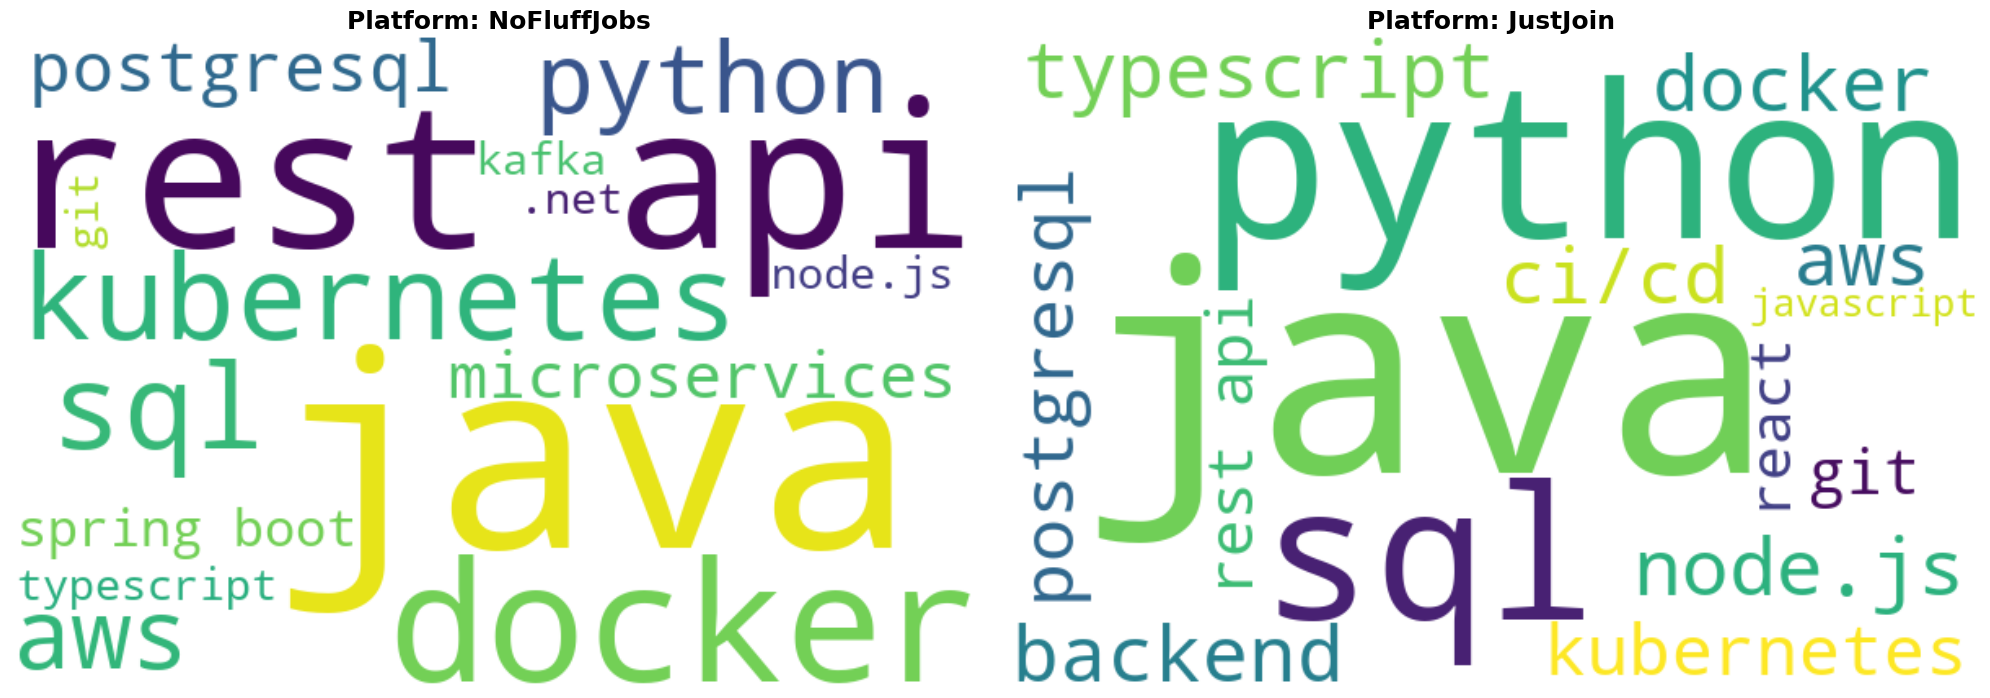

Comparison chart saved successfully to: combined_skills_comparison.png


In [14]:
# ============================================================
# CELL #16: Visualize job data with Word Cloud by platform
# fetch job market data from MongoDB, extract required technical skills,
# and generate comparative word cloud visualizations to highlight key industry demands across different platforms.
# ============================================================


from JobDataCloudImageGenerator import JobDataCloudImageGenerator
from constant import CollectionEnum

visualizer = JobDataCloudImageGenerator()
visualizer.compare_platforms([CollectionEnum.NO_FLUFF_JOBS, CollectionEnum.JUST_JOIN])

🏠 Connecting to Local MongoDB...
✅ Successfully connected to database: BD_final

--- Result: JustJoin ---
MAE: 7291.54 PLN
R²: -0.55


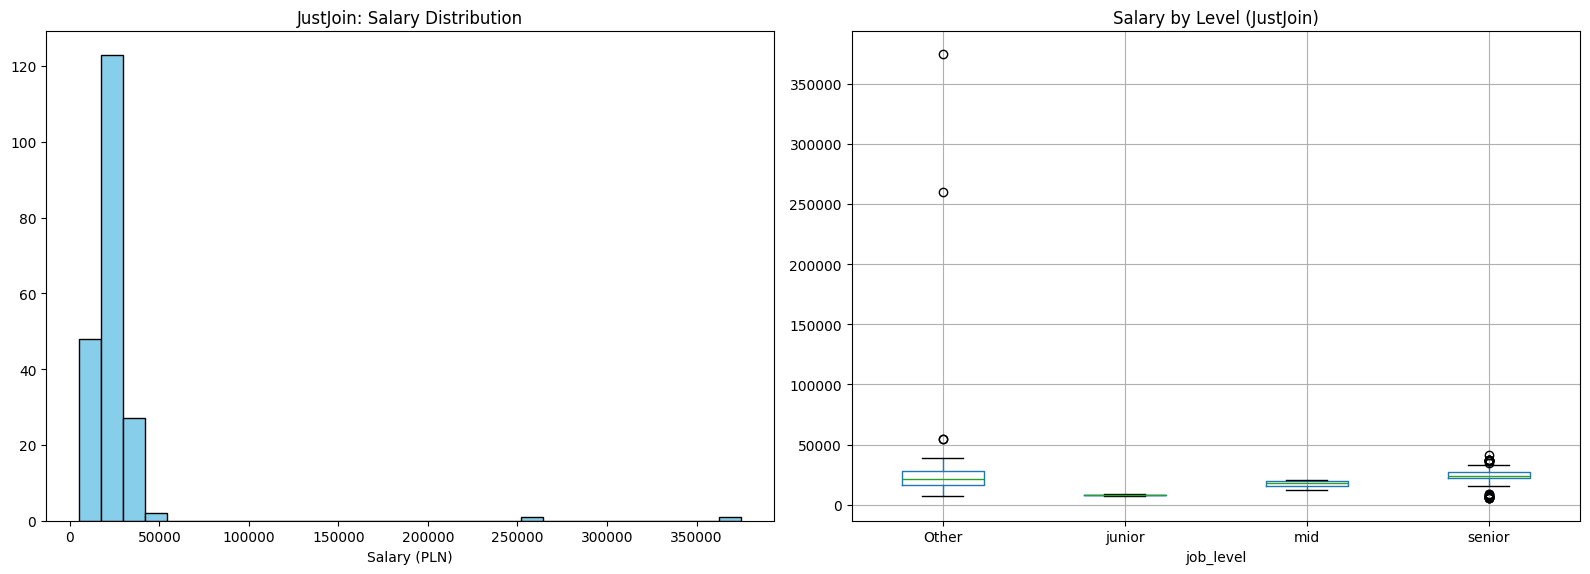


--- Result: NoFluffJobs ---
MAE: 8140.16 PLN
R²: 0.04


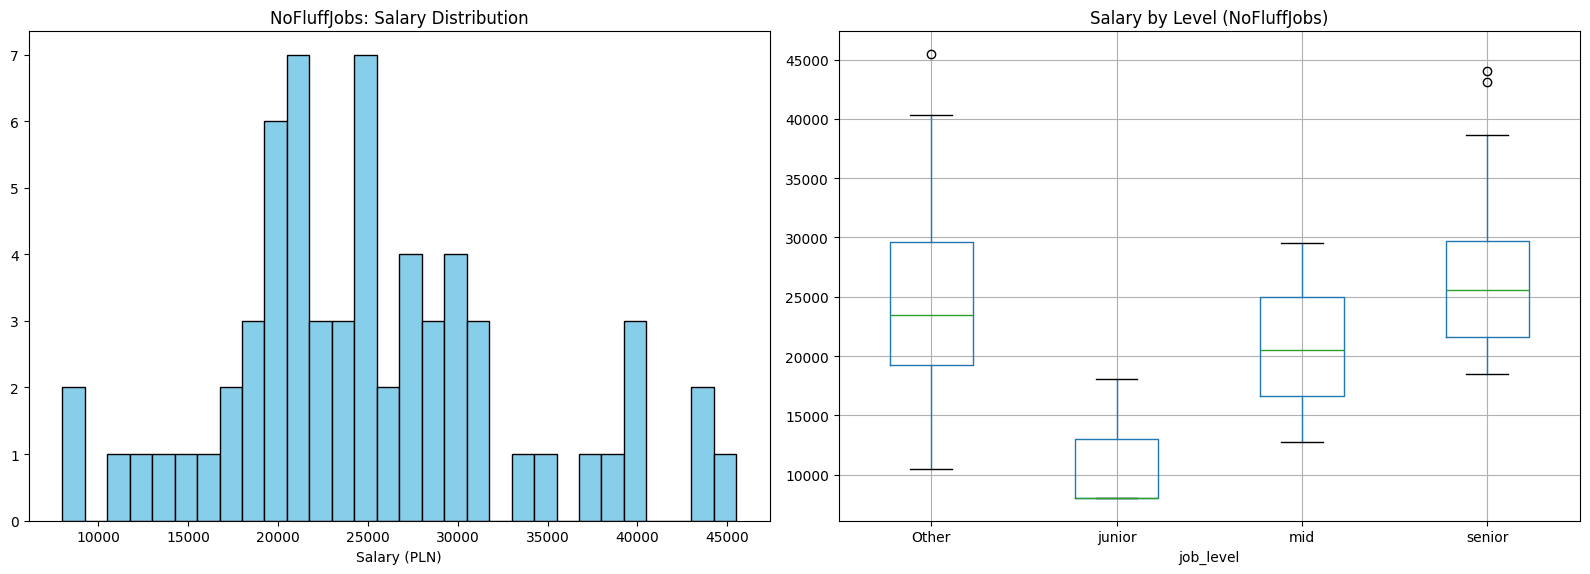

In [15]:
# ============================================================
# CELL #17: Define Salary Prediction Model Manager Class
# Description: Class for processing job data and training 
# Machine Learning models to predict average salaries.
# Includes: Data cleaning, Feature Engineering (seniority levels),
# Scikit-learn Pipelines, and statistical visualization.
# ============================================================

from SalaryModelManager import SalaryModelManager
from constant import CollectionEnum

manager = SalaryModelManager()

for platform in [CollectionEnum.JUST_JOIN, CollectionEnum.NO_FLUFF_JOBS]:
    manager.train_and_evaluate(platform)

    